In [1]:
import numpy as np
import h5py

from scipy.interpolate import RegularGridInterpolator as interpnd

In [2]:
class EqChem:
    def __init__(self, species, P_grid, T_grid, CO_grid, NO_grid, FeH_grid, save_path='/net/lem/data2/regt/fastchem_tables/'):

        self.species = species
        #self.points  = (P_grid, T_grid, CO_grid, NO_grid, FeH_grid)
        self.points  = (P_grid, T_grid, CO_grid, FeH_grid)
        
        self.interp_func = {
            el: self._load_interp_func(el, save_path=save_path) for el in self.species
            }
        self.interp_func['MMW'] = self._load_interp_func('MMW', 'MMW', save_path=save_path)

    def _load_interp_func(self, el, key='log_VMR', save_path='./data/'):
        
        # Load save
        file = f'{save_path}/{el}.hdf5'
        with h5py.File(file, 'r') as f:
            s_arr = f[key][...]

        #return interpnd(points=self.points, values=s_arr, method='linear')
        return interpnd(points=self.points, values=s_arr[:,:,:,0,:], method='linear')

    def __call__(self, el, P, T, CO, NO, FeH):

        NO = 0.13803842646028866
        
        #return self.interp_func[el](xi=(P, T, CO, NO, FeH))
        return self.interp_func[el](xi=(P, T, CO, FeH))

P_grid   = 10**np.arange(-6,3+1e-6,0.1)
T_grid   = np.arange(150,6000+1e-6,50)
CO_grid  = np.arange(0.1,1.6+1e-6,0.1)
#NO_grid  = [FC.solar_NO] #np.arange(0.0,0.5+1e-6,0.1)
NO_grid  = [None]
FeH_grid = np.arange(-10,10+1e-6,1)/10

Chem = EqChem(
    species=['C1O1','H2O1','C1H4','C1O2','N2','H3N1','C1H1N1_1', 'Fe1H1', 'H2S1', 'H3P1', 'F1H1'], 
    P_grid=P_grid, 
    T_grid=T_grid, 
    CO_grid=CO_grid, 
    NO_grid=NO_grid, 
    FeH_grid=FeH_grid, 
    )

KeyError: 'Cr1H1'

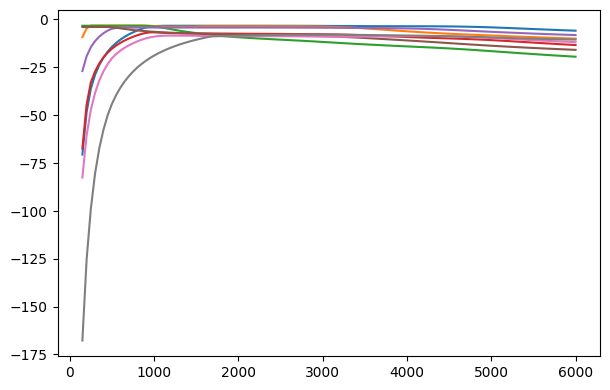

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4.5))
for el in ['C1O1','H2O1','C1H4','C1O2','N2','H3N1','C1H1N1_1','Fe1H1','Cr1H1','H2S1']:
    VMR_i = Chem(el=el, P=0.1, T=T_grid, CO=0.6, NO=NO_grid[0], FeH=0.0)
    plt.plot(T_grid, VMR_i, label=el)
plt.ylim(-12,-2); plt.xlim(0,2500)
plt.legend()
plt.show()

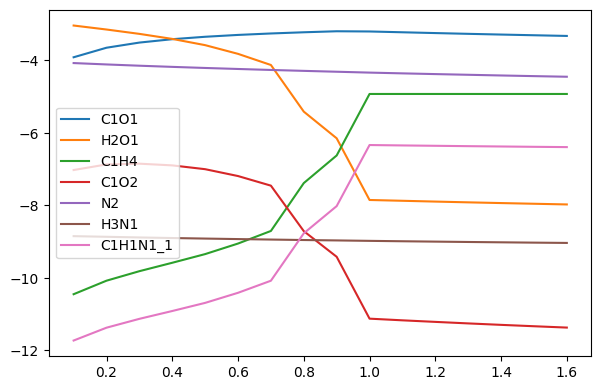

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4.5))
for el in ['C1O1','H2O1','C1H4','C1O2','N2','H3N1','C1H1N1_1']:
    VMR_i = Chem(el=el, P=1e-3, T=1200, CO=CO_grid, NO=0.14, FeH=0)
    plt.plot(CO_grid, VMR_i, label=el)
plt.legend()
plt.show()

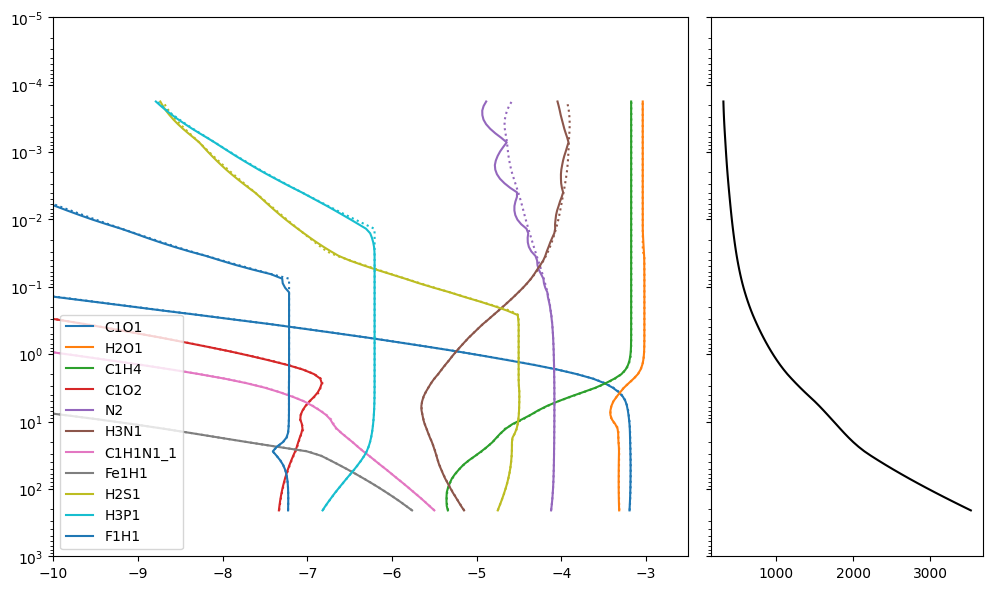

In [69]:
#P, T = np.loadtxt('/net/lem/data1/regt/fastchem/input/example_p_t_structures/Late_M-dwarf.dat').T
#P, T = np.loadtxt('/net/lem/data1/regt/fastchem/input/example_p_t_structures/Brown_dwarf_Sonora.dat').T
P, T = np.loadtxt('/net/lem/data1/regt/fastchem/input/example_p_t_structures/Brown_dwarf_Sonora.dat').T
#P, T = np.loadtxt('/net/lem/data1/regt/fastchem/input/example_p_t_structures/Gliese_229b.dat').T
#P, T = np.loadtxt('/net/lem/data1/regt/fastchem/input/example_p_t_structures/Kepler-7b.dat').T

T *= 1.25

import matplotlib.pyplot as plt
fig, ax = plt.subplots(
    figsize=(12,7), ncols=2, 
    gridspec_kw={'width_ratios':[0.7,0.3], 'wspace':0.05}
    )
ax[1].plot(T, P, c='k')
#ax[1].plot(T*1.2, P, c='k', ls=':')

FC.species = ['C1O1','H2O1','C1H4','C1O2','N2','H3N1','C1H1N1_1', 'Fe1H1', 'H2S1', 'H3P1', 'F1H1']
VMRs, MMW = FC.get_VMRs(P=P, T=T, CO=0.55, FeH=0.15)

for i, el in enumerate(FC.species):
    VMR_i = Chem(el=el, P=P, T=T, CO=0.55, NO=0.14, FeH=0.15)
    ax[0].plot(VMR_i, P, c=f'C{i}', label=el)

    #VMR_i = Chem(el=el, P=P, T=T, CO=0.6, NO=0.14, FeH=0.5)
    #VMR_i = Chem(el=el, P=P, T=T*1.2, CO=0.6, NO=0.14, FeH=0.0)
    #ax[0].plot(VMR_i, P, c=f'C{i}', ls=':')
    
    ax[0].plot(np.log10(VMRs[:,i]), P, c=f'C{i}', ls=':')

ax[0].legend()
ax[0].set(yscale='log', ylim=(1e3,1e-5), xlim=(-10,-2.5))
ax[1].set(yscale='log', ylim=(1e3,1e-5), yticklabels=[], )#xlim=(0,600))
plt.show()